In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load data

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/Praktikum 3/Data/socr.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [ ]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)" :"tinggi_cm",
                     "Weight(Pounds)" : "berat_kg"})
    .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54, # in -> cm
        berat_kg=lambda d: d["berat_kg"] * 0.45359237 # lb -> kg
    )
    .round({"tinggi_cm": 2, "berat_kg":2})

).copy()
df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [ ]:
from sklearn.model_selection import train_test_split
x = df1[["tinggi_cm"]]
y = df1 [["berat_kg"]]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=7
)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm):", model.coef_[0][0])
print("Intersep (kg):", model.intercept_[0])
print("R2 (test):", r2)
print("MAE (kg):", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (kg):", rmse)

Koefisien (kg per cm): 0.5518232618278286
Intersep (kg): -37.657088783833586
R2 (test): 0.24989263013277574
MAE (kg): 3.6704107898943548
RMSE (kg): 4.609006140308042


In [ ]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan: y = 0.552 * x + -37.657


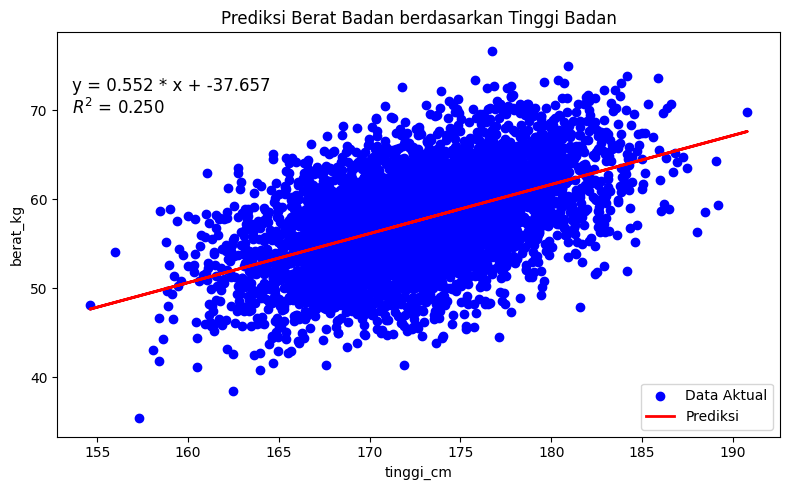

In [ ]:
import matplotlib.pyplot as plt

#plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color='blue', label='Data Aktual')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Prediksi')
plt.xlabel("tinggi_cm")
plt.ylabel("berat_kg")
plt.title("Prediksi Berat Badan berdasarkan Tinggi Badan")
plt.text(
    0.02, 0.89,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    va='top'
)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
y_pred_test = model.predict(x_test)

# Buat tabel hasil (tinggi, aktual, prediksi,dan error)
hasil = pd.DataFrame({
    'tinggi_cm': x_test['tinggi_cm'],
    'aktual_berat_kg': y_test['berat_kg'],
    'prediksi_berat_kg': y_pred_test[:, 0], # Select the first column to make it 1D
})

#selisih error (posiitif = overpredict)
hasil ["Selisih error (kg)"] = hasil["prediksi_berat_kg"] - hasil["aktual_berat_kg"]


denom = hasil["aktual_berat_kg"].replace(0, np.nan)
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs()/denom)).clip(lower=0, upper=1) * 100

# Tampilkan tabel hasil
print(hasil)

ValueError: Per-column arrays must each be 1-dimensional